In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('crime_data.csv', index_col=0)
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [3]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [23]:
db = DBSCAN(min_samples=2)
y = db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  2,  1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1],
      dtype=int64)

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(x,y)

-0.2689925316677858

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
neigh = NearestNeighbors(n_neighbors=4).fit(x)
dist,ind = neigh.kneighbors(x)

In [28]:
dist = np.sort(dist, axis=0)
dist

array([[0.        , 0.2079438 , 0.50466926, 0.53326883],
       [0.        , 0.2079438 , 0.52515083, 0.57035779],
       [0.        , 0.35377437, 0.53571007, 0.61894533],
       [0.        , 0.35377437, 0.53571007, 0.65227142],
       [0.        , 0.43312429, 0.58411812, 0.71097658],
       [0.        , 0.43312429, 0.61451768, 0.72282762],
       [0.        , 0.49909939, 0.61451768, 0.72282762],
       [0.        , 0.49909939, 0.61894533, 0.73797792],
       [0.        , 0.50466926, 0.63822131, 0.74649625],
       [0.        , 0.52515083, 0.63822131, 0.7665773 ],
       [0.        , 0.53326883, 0.65227142, 0.77219944],
       [0.        , 0.54082482, 0.70111326, 0.78602982],
       [0.        , 0.54082482, 0.70471473, 0.81522244],
       [0.        , 0.55122406, 0.74412537, 0.82632706],
       [0.        , 0.57035779, 0.78602982, 0.83710697],
       [0.        , 0.58411812, 0.78923123, 0.83710697],
       [0.        , 0.59956023, 0.81522244, 0.92509451],
       [0.        , 0.59956023,

In [29]:
d = dist[:,1]
d

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

Text(0.5, 1.0, 'K-dist Plot')

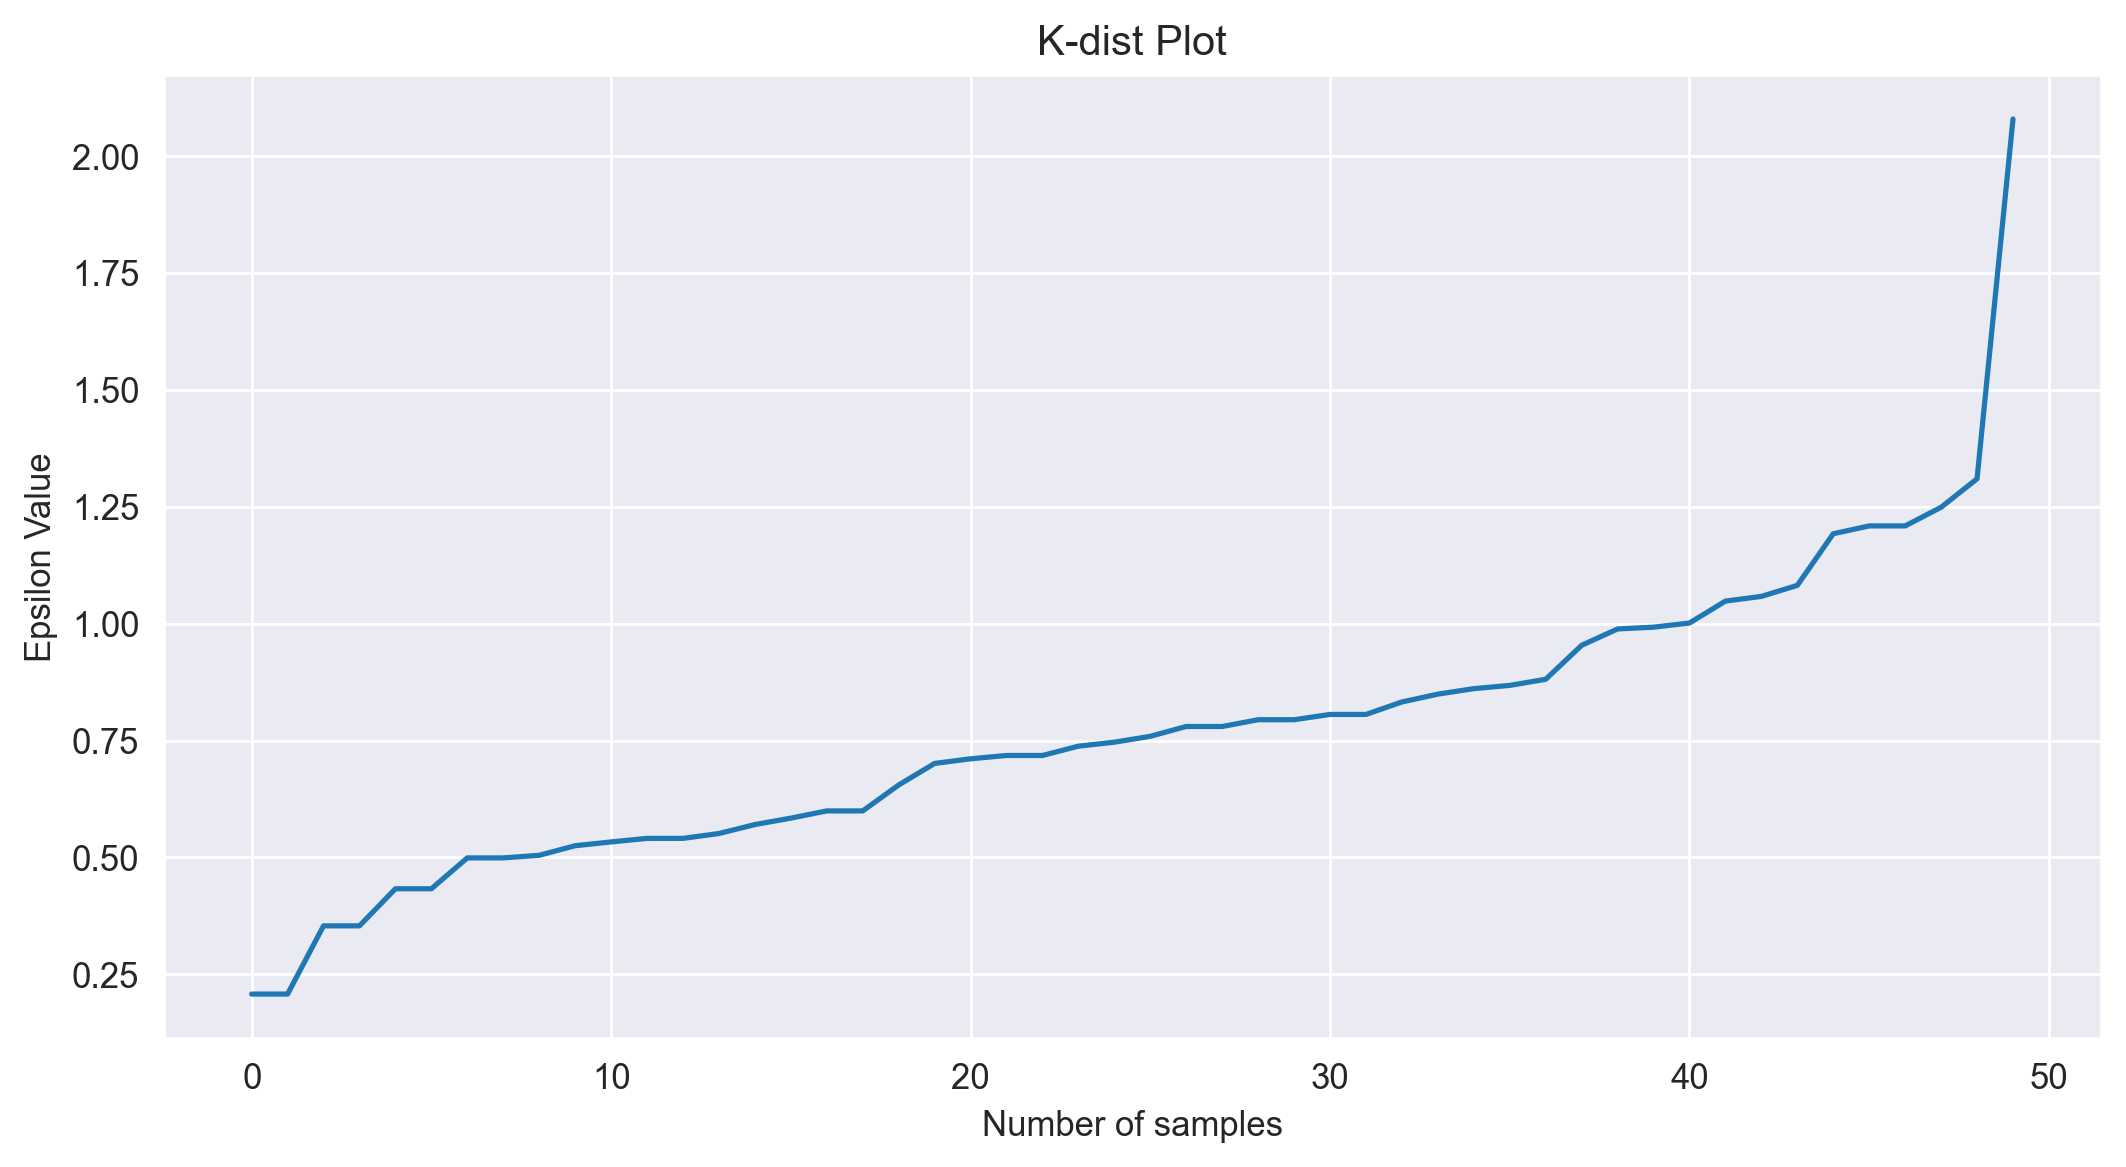

In [30]:
plt.plot(d)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

In [32]:
db = DBSCAN(eps=0.35,min_samples=2)
y = db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [33]:
silhouette_score(x,y)

0.038817626029398714

In [34]:
df['y'] = y